1.
Doodle scheduling

In [55]:
using JuMP, NamedArrays, Clp

availability =
  [ 0 0 1 1 0 0 0 1 1 0 0 0 0
    0 1 1 0 0 0 0 0 1 1 0 0 0
    0 0 0 1 1 0 1 1 0 1 1 1 1
    0 0 0 1 1 1 1 1 1 1 1 1 0
    0 0 0 0 0 0 1 1 1 0 0 0 0
    0 1 1 0 0 0 0 0 1 1 0 0 0
    0 0 0 1 1 1 1 0 0 0 0 0 0
    1 1 0 0 0 0 0 0 0 0 1 1 1
    1 1 1 0 0 0 0 0 0 1 1 0 0
    0 0 0 0 0 0 0 1 1 0 0 0 0
    0 0 0 0 0 0 1 1 1 0 0 0 0
    1 1 0 0 0 1 1 1 1 0 0 1 1
    1 1 1 0 1 1 0 0 0 0 0 1 1
    0 1 1 1 0 0 0 0 0 0 0 0 0
    1 1 0 0 1 1 0 0 0 0 0 0 0 ]

TIMES = ["10:00","10:20","10:40","11:00","11:20","11:40","lunch","1:00","1:20","1:40","2:00","2:20","2:40"]
NAMES = [:Manuel,:Luca,:Jule,:Michael,:Malte,:Chris,:Spyros,:Mirjam,:Matt,:Florian,:Josep,:Joel,:Tom,:Daniel,:Anne ]
times = NamedArray( availability, (NAMES,TIMES), ("NAME","TIME"))
demand = Dict(zip( TIMES, [1 1 1 1 1 1 3 1 1 1 1 1 1] ))

m = Model(solver = ClpSolver())

@variable(m, x[NAMES,TIMES] >= 0)

# each person has to attend exactly one meeting
@constraint(m, a[i in NAMES], sum(x[i,j] for j in TIMES) == 1 )

# each time slot has to have one person
@constraint(m,  dem[j in TIMES], sum(x[i,j] * times[i, j] for i in NAMES) == demand[j])

@objective(m, Min, 0)

solve(m)
solution = NamedArray( Int[getvalue(x[i,j]) for i in NAMES, j in TIMES], (NAMES,TIMES), ("name","time") )
show(IOContext(STDOUT, limit=false), "text/plain", solution)

15×13 Named Array{Int64,2}
name ╲ time │ 10:00  10:20  10:40  11:00  11:20  11:40  lunch   1:00   1:20   1:40   2:00   2:20   2:40
────────────┼──────────────────────────────────────────────────────────────────────────────────────────
:Manuel     │     0      0      1      0      0      0      0      0      0      0      0      0      0
:Luca       │     0      0      0      0      0      0      0      0      0      1      0      0      0
:Jule       │     0      0      0      1      0      0      0      0      0      0      0      0      0
:Michael    │     0      0      0      0      0      0      1      0      0      0      0      0      0
:Malte      │     0      0      0      0      0      0      1      0      0      0      0      0      0
:Chris      │     0      0      0      0      0      0      0      0      1      0      0      0      0
:Spyros     │     0      0      0      0      0      1      0      0      0      0      0      0      0
:Mirjam     │     0      0      0    

Therefore, we have the following schdule:


10:00 : Anne


10:20 : Daniel


10:40 : Manuel


11:00 : Jule


11:20 : Tom


11:40 : Spyros


Lunch : Michael, Malte, Josep


1:00 : Florian


1:20 : Chris


1:40 : Luca


2:00 : Matt


2:20 : Mirjam


2:40 : Joel

2.
Car rental

In [56]:
using JuMP, NamedArrays, Clp

agency = [:1, :2, :3, :4, :5, :6, :7, :8, :9, :10]
x_cord = Dict(zip(agency, [0 20 18 30 35 33 5 5 11 2] ))
y_cord = Dict(zip(agency, [0 20 10 12 0 25 27 10 0 15] ))
demand = Dict(zip(agency, [10 6 8 11 9 7 15 7 9 12] ))
stock = Dict(zip(agency, [8 13 4 8 12 2 14 11 15 7]))

dist = [sqrt((x_cord[i] - x_cord[j])^2 + (y_cord[i] - y_cord[j])^2) for i in agency, j in agency]
distance = NamedArray( dist, (agency,agency), ("agency","agency"))
#show(IOContext(STDOUT, limit=false), "text/plain", distance)

m = Model(solver = ClpSolver())

# the solution array for transportation between agencies
@variable(m, transport[agency,agency] >= 0)

# number of cars inported + number of cars in stock - number of cars deported >= demand
@constraint(m, a[i in agency], sum((transport[j, i] - transport[i, j]) for j in agency) + stock[i] >= demand[i])

# total cost of the transportation
@expression(m, cost,sum(transport[i, j]*distance[i, j]*0.5*1.3 for i in agency, j in agency))
@objective(m, Min, cost)

status = solve(m)
println()
println(status)
solution = NamedArray( Int[getvalue(transport[i,j]) for i in agency, j in agency], (agency,agency), ("agency out","agency in") )
show(IOContext(STDOUT, limit=false), "text/plain", solution)
println()
println()
println("The optimal cost will be: \$", getvalue(cost))
#show(IOContext(STDOUT, limit=false), "text/plain", distance)


Optimal
10×10 Named Array{Int64,2}
agency out ╲ agency in │  1   2   3   4   5   6   7   8   9  10
───────────────────────┼───────────────────────────────────────
1                      │  0   0   0   0   0   0   0   0   0   0
2                      │  0   0   1   0   0   5   1   0   0   0
3                      │  0   0   0   0   0   0   0   0   0   0
4                      │  0   0   0   0   0   0   0   0   0   0
5                      │  0   0   0   3   0   0   0   0   0   0
6                      │  0   0   0   0   0   0   0   0   0   0
7                      │  0   0   0   0   0   0   0   0   0   0
8                      │  0   0   0   0   0   0   0   0   0   5
9                      │  2   0   3   0   0   0   0   1   0   0
10                     │  0   0   0   0   0   0   0   0   0   0

The optimal cost will be: $152.63901632295628


According to the table, we know that:



We need to move 1 car from 2 to 3;


we need to move 5 cars from 2 to 6;


we need to move 1 car from 2 to 7;


we need to move 3 cars from 5 to 4;


we need to move 5 cars from 8 to 10;


we need to move 2 cars from 9 to 1;


we need to move 3 cars from 9 to 3;


we need to move 1 car from 9 to 8.

3.Building a stadium


(a).

In [57]:
using JuMP, Clp

tasks = 1:18
durations = [2 16 9 8 10 6 2 2 9 5 3 2 1 7 4 3 9 1]
predecessors = ( [], [1], [2], [2], [3], [4,5], [4], [6], [4,6], [4], [6], [9], [7], [2], [4,14], [8,11,14], [12], [17] )
pred_dict = Dict(zip(tasks,predecessors));   # dictionary mapping tasks --> predecessors.

# additional columns of data (maximum reduction possible )
max_reduction =  [0,  3,  1,  2,  2,  1, 1, 0,  2,  1,  1, 0, 0,  2,  2, 1,  3, 0]  # max reduction (in weeks)
cost_reduction = [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16, 0]  # cost of reduction ($1,000/week)
bonus_amount = 30     # bonus for expediting the project ($1,000/week )
;
duration = Dict(zip(tasks, durations))

m = Model(solver = ClpSolver())

# tstart is the start time for each task
@variable(m, tstart[tasks])

@constraint(m, link[i in tasks, j in pred_dict[i]], tstart[i] >= tstart[j] + duration[j])
@constraint(m, tstart[:1] == 0)
@objective(m, Min, tstart[:18] + duration[:18])

status = solve(m)
println(status)
println("The earliest possible date of completion for the construction is : ", getvalue(tstart[:18] + duration[:18]))

Optimal
The earliest possible date of completion for the construction is : 64.0


Therefore the earliest possible time of completion for the construction is 64 weeks.

(b).

In [58]:
using JuMP, Clp

tasks = 1:18
durations = [2 16 9 8 10 6 2 2 9 5 3 2 1 7 4 3 9 1]
predecessors = ( [], [1], [2], [2], [3], [4,5], [4], [6], [4,6], [4], [6], [9], [7], [2], [4,14], [8,11,14], [12], [17] )
pred_dict = Dict(zip(tasks,predecessors));   # dictionary mapping tasks --> predecessors.

# additional columns of data (maximum reduction possible )
max_reduction =  [0,  3,  1,  2,  2,  1, 1, 0,  2,  1,  1, 0, 0,  2,  2, 1,  3, 0]  # max reduction (in weeks)
cost_reduction = [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16, 0]  # cost of reduction ($1,000/week)
bonus_amount = 30     # bonus for expediting the project ($1,000/week )
;

duration = Dict(zip(tasks, durations))

max_reduct = [0, 3, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 3, 0]
cost_reduct = [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16, 0]

max_reduction = Dict(zip(tasks, max_reduct))
reduction_cost = Dict(zip(tasks, cost_reduct))

m = Model(solver = ClpSolver())

# the start time of each task
@variable(m, tstart[tasks])

# the time to reduce for each task
@variable(m, reduction_time[tasks])

# constraint for reduction time
@constraint(m, a[i in tasks], 0 <= reduction_time[i] <= max_reduction[i])

# start time of a task >= start time of the predecessor + duration of the predecessor - reduced time of the predecessor
@constraint(m, link[i in tasks, j in pred_dict[i]], tstart[i] >= tstart[j] + duration[j] - reduction_time[j])

@constraint(m, tstart[:1] == 0)

@expression(m, net_profit, sum(reduction_time[j] for j in tasks)*30 - sum(reduction_time[i]*reduction_cost[i] for i in tasks) )

@objective(m, Max, net_profit)
status = solve(m)
println(status)
println()
println("The reduced time for completion is : ",getvalue(tstart[:18] + duration[:18]))
println("The profit is : ", getvalue(net_profit))

Optimal

The reduced time for completion is : 54.0
The profit is : 242.0


Therefore, the reduced time for completion is 54 weeks, this yields a profit of 242K$.

4.

Museum site planning

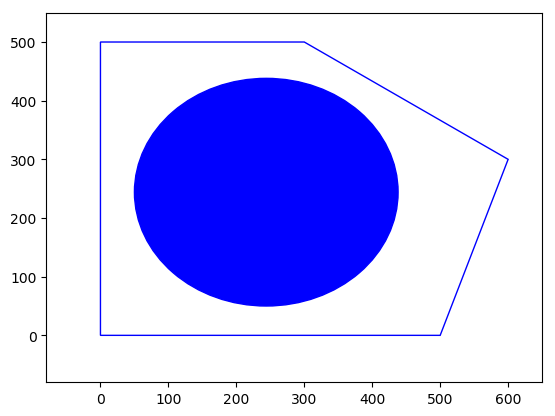

Optimal
The coordinates of the center are : [244.029, 244.029]
The optimal radius is : 194.02852679380183


In [59]:
A = [0 1; -1 0; 0 -1; 1 3/2; 1 -1/3]
b = [500; 0; 0; 1050; 500]

using JuMP, Clp, PyPlot, PyCall

m = Model(solver=ClpSolver())

@variable(m, r >= 0)
@variable(m, x[1:2])

for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + (r+50)*norm(A[i,:]) <= b[i])
end

@objective(m, Max, r)

status = solve(m)
println(status)
println("The coordinates of the center are : ", getvalue(x))
println("The optimal radius is : ", getvalue(r))

@pyimport matplotlib.patches as patches
fig, ax = plt[:subplots]()
xlim(-80, 650)
ylim(-80, 550)
poly = patches.Polygon([0 500; 300 500; 600 300; 500 0; 0 0], closed=true, fill=false, color="b")
ax[:add_artist](poly)
circle = patches.Circle([244.029, 244.029], 194.02852679380183, color = "b")
ax[:add_artist](circle)
show()

Therefore, the best way to put this circle shaped museum is to put its center at coordinates [244.029, 244.029]


with optimal radius r = 194.02852679380183